<a href="https://colab.research.google.com/github/alphadi/Portfolio_Projects/blob/main/Kaggle/Intro_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploring the main 3 types of Machine Learning



*   Supervised
*   Unsupervised
*   Reinforcement






Supervised Learning can be split into 2 groups : Classification and Regression

In [ ]:
heights = [4.2, 5.5, 6.0, 6.2, 3.5, 4.7]
weights = [70,  130, 150, 200, 50,  120]

import pandas as pd
df = pd.DataFrame({'Height (ft)':heights, 'Weight (lb)':weights})
df.head()

,Height (ft),Weight (lb)
0,4.2,70
1,5.5,130
2,6.0,150
3,6.2,200
4,3.5,50


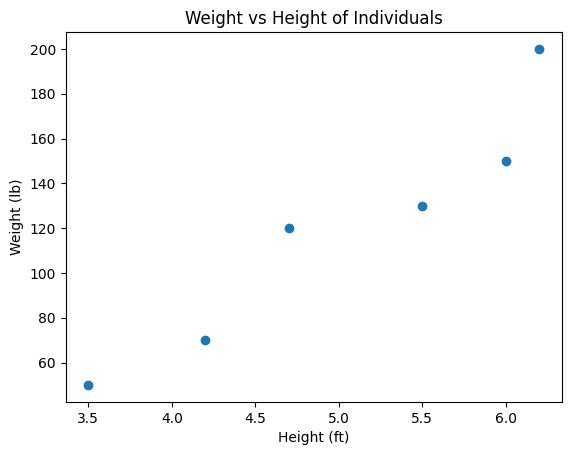

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['Height (ft)'], df['Weight (lb)'])
plt.xlabel('Height (ft)')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Height of Individuals')

plt.show()

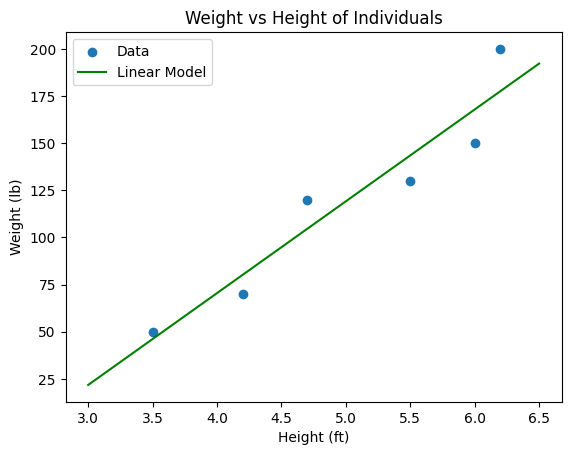

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

X_train = df[['Height (ft)']].to_numpy().reshape(-1,1)
y_train = df['Weight (lb)'].to_numpy()

linear_model = LinearRegression().fit(X_train, y_train)

dummy_inputs = np.linspace(3,6.5)
dummy_predictions = linear_model.predict(dummy_inputs.reshape(-1,1))

plt.scatter(df['Height (ft)'], df['Weight (lb)'], label='Data')
plt.plot(dummy_inputs, dummy_predictions, color='green', label='Linear Model')
plt.xlabel('Height (ft)')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Height of Individuals')
plt.legend()
plt.show()

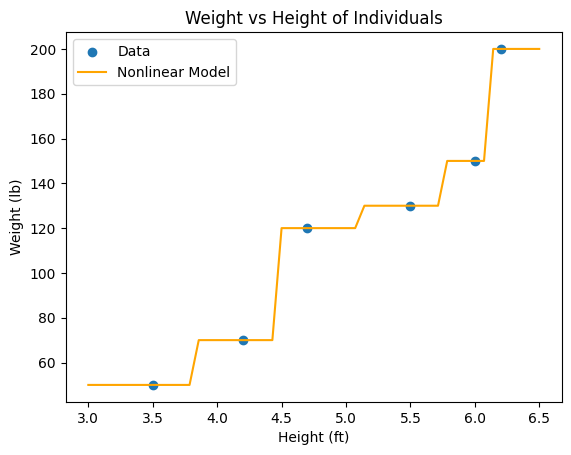

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

rf_model = GBC().fit(X_train.reshape(-1,1), y_train)
more_dummy_inputs = np.linspace(3,6.5)
more_dummy_predictions = rf_model.predict(more_dummy_inputs.reshape(-1,1))

plt.scatter(df['Height (ft)'], df['Weight (lb)'], label='Data')
plt.plot(more_dummy_inputs, more_dummy_predictions, color='orange', label='Nonlinear Model')
plt.xlabel('Height (ft)')
plt.ylabel('Weight (lb)')
plt.title('Weight vs Height of Individuals')
plt.legend()
plt.show()

In [ ]:
print(np.linspace(3,6))

[3.         3.06122449 3.12244898 3.18367347 3.24489796 3.30612245
 3.36734694 3.42857143 3.48979592 3.55102041 3.6122449  3.67346939
 3.73469388 3.79591837 3.85714286 3.91836735 3.97959184 4.04081633
 4.10204082 4.16326531 4.2244898  4.28571429 4.34693878 4.40816327
 4.46938776 4.53061224 4.59183673 4.65306122 4.71428571 4.7755102
 4.83673469 4.89795918 4.95918367 5.02040816 5.08163265 5.14285714
 5.20408163 5.26530612 5.32653061 5.3877551  5.44897959 5.51020408
 5.57142857 5.63265306 5.69387755 5.75510204 5.81632653 5.87755102
 5.93877551 6.        ]


In [ ]:
p = [0.01, 0.05, 0.01, 0.02, 0.8, 0.01, 0.01, 0.02, 0.01, 0.06]

pd.Series({str(k) + "?":str(p[k]*100)+"%" for k in range(10)})

,0
0?,1.0%
1?,5.0%
2?,1.0%
3?,2.0%
4?,80.0%
5?,1.0%
6?,1.0%
7?,2.0%
8?,1.0%
9?,6.0%


## Unsupervised Learning

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


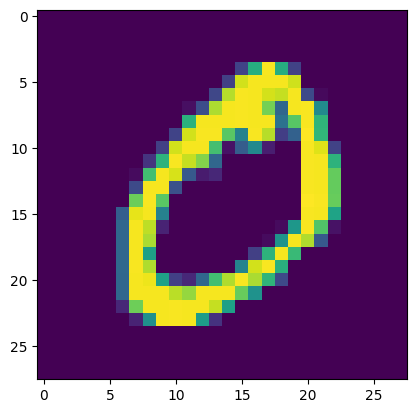

In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (_, _) = mnist.load_data()

X_train.shape, y_train.shape

plt.imshow(X_train[1])

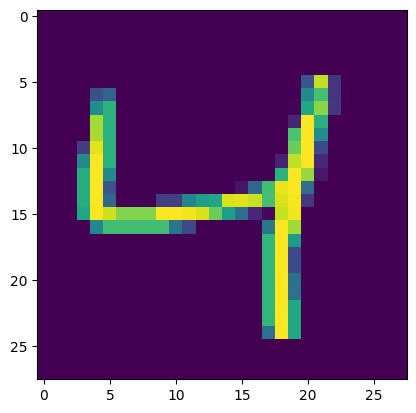

In [ ]:
plt.imshow(X_train[2])

In [ ]:
from sklearn.decomposition import PCA

print(f"{X_train[0].shape} = 784")

(28, 28) = 784


In [ ]:
import plotly.express as px

X_train_pca = PCA(n_components=2).fit_transform(X_train.reshape(60000, -1))

px.scatter(x=X_train_pca[:, 0], y=X_train_pca[:, 1],
           hover_name=y_train, color=y_train, title="Digits After PCA Transform")

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_

px.scatter(x=X[:, 0], y=X[:, 1], hover_name=labels, color=labels)

## Machine Learning Model Errors


In [ ]:
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')[['total_bedrooms','total_rooms']]
df.head()

,total_bedrooms,total_rooms
0,1283.0,5612.0
1,1901.0,7650.0
2,174.0,720.0
3,337.0,1501.0
4,326.0,1454.0


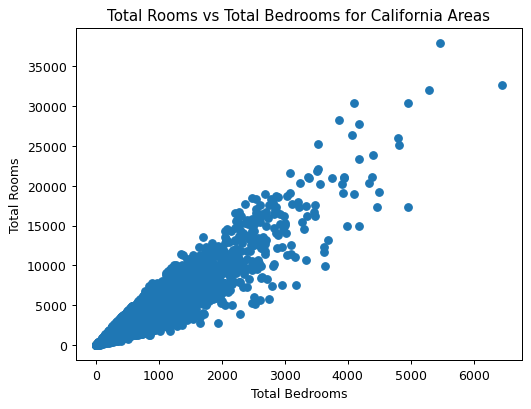

In [ ]:
total_bedrooms_np = df['total_bedrooms'].to_numpy()
total_rooms_np = df['total_rooms'].to_numpy()

import matplotlib.pyplot as plt

plt.figure(dpi=90)
plt.scatter(total_bedrooms_np, total_rooms_np)
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Total Bedrooms for California Areas')
plt.show()

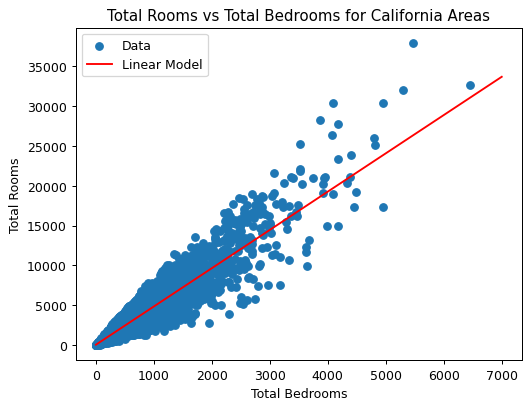

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(total_bedrooms_np.reshape((-1, 1)),
                                      total_rooms_np)

import numpy as np
dummy_inputs = np.linspace(0, 7000, num=2000)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1, 1)))

plt.figure(dpi=90)
plt.scatter(total_bedrooms_np, total_rooms_np, label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Total Bedrooms for California Areas')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error as mae

x = sum(np.abs(linear_model.predict(total_bedrooms_np.reshape((-1, 1))) - total_rooms_np))

print(f"Total Error: {x:,.0f}")

Total Error: 8,485,140


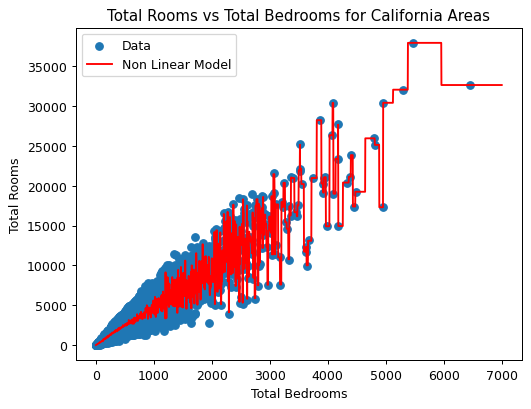


Total Error: 6,987,989


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr = GBR(learning_rate=0.5, n_estimators=1000).fit(total_bedrooms_np.reshape((-1, 1)),
                                      total_rooms_np)

dummy_inputs = np.linspace(0, 7000, num=2000)
dummy_predictions = gbr.predict(dummy_inputs.reshape((-1, 1)))

plt.figure(dpi=90)
plt.scatter(total_bedrooms_np, total_rooms_np, label='Data')
plt.plot(dummy_inputs, dummy_predictions, label='Non Linear Model', color='red')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Total Bedrooms for California Areas')
plt.legend()
plt.show()

x = sum(np.abs(gbr.predict(total_bedrooms_np.reshape((-1, 1))) - total_rooms_np))

print()
print(f"Total Error: {x:,.0f}")

In [ ]:
gbr.score(total_bedrooms_np.reshape((-1, 1)), total_rooms_np)

0.9255428464859142

In [ ]:
gbr.predict(np.array([[1000]])) - gbr.predict(np.array([[0]]))

array([4991.98711256])

## Underfitting vs Overfitting, Train vs Tests Sets and Bias vs Variance tradeoff

In [ ]:
# let's analyze the test dataset

test_df = pd.read_csv('sample_data/california_housing_test.csv')[['total_bedrooms', 'total_rooms']]

test_df

,total_bedrooms,total_rooms
0,661.0,3885.0
1,310.0,1510.0
2,507.0,3589.0
3,15.0,67.0
4,244.0,1241.0
...,...,...
2995,642.0,1450.0
2996,1082.0,5257.0
2997,201.0,956.0
2998,14.0,96.0


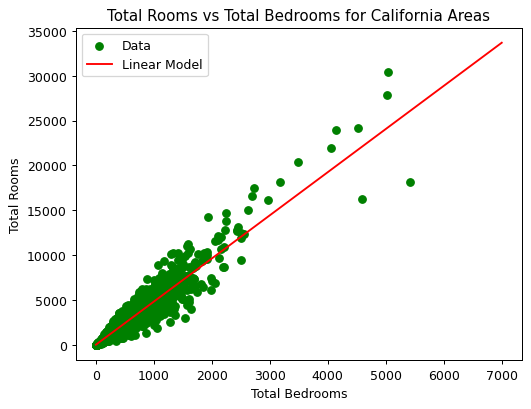

In [ ]:
total_bedrooms_np_test = test_df.total_bedrooms.to_numpy()
total_rooms_np_test = test_df.total_rooms.to_numpy()
dummy_inputs = np.linspace(0, 7000, num=2000)
dummy_predictions = linear_model.predict(dummy_inputs.reshape((-1, 1)))

plt.figure(dpi=90)
plt.scatter(total_bedrooms_np_test, total_rooms_np_test, label='Data', color='green')
plt.plot(dummy_inputs, dummy_predictions, label='Linear Model', color='red')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Total Bedrooms for California Areas')
plt.legend()
plt.show()

In [ ]:
x = sum(np.abs(linear_model.predict(total_bedrooms_np_test.reshape((-1, 1))) - total_rooms_np_test))

print(f"Total Error: {x:,.0f}")

Total Error: 1,432,540


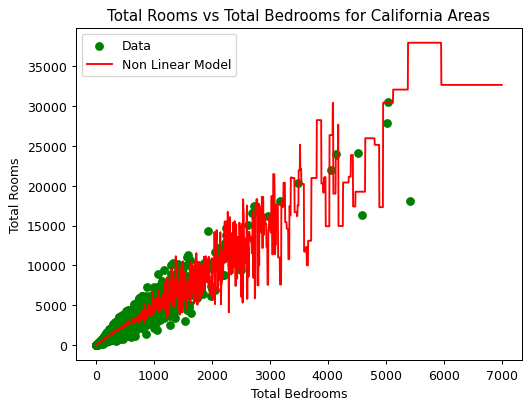

In [ ]:
dummy_inputs = np.linspace(0, 7000, num=1500)
dummy_predictions = gbr.predict(dummy_inputs.reshape((-1, 1)))

plt.figure(dpi=90)
plt.scatter(total_bedrooms_np_test, total_rooms_np_test, label='Data', color='green')
plt.plot(dummy_inputs, dummy_predictions, label='Non Linear Model', color='red')
plt.xlabel('Total Bedrooms')
plt.ylabel('Total Rooms')
plt.title('Total Rooms vs Total Bedrooms for California Areas')
plt.legend()
plt.show()

high bias -> underfit

high variance -> overfit

not too much bias and variace -> accurate fit

## Simple Linear Regression

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


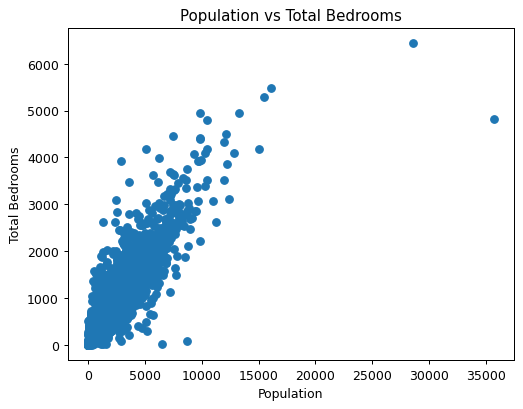

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=90)
plt.scatter(df['population'],df['total_bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.title('Population vs Total Bedrooms')
plt.show()

In [ ]:
pop_np = df['population'].to_numpy()
total_bedrooms_np = df['total_bedrooms'].to_numpy()

pop_np.shape, total_bedrooms_np.shape

((17000,), (17000,))

In [ ]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(pop_np.reshape((17000, 1)),
                                      total_bedrooms_np)

linear_model_predictions = linear_model.predict(pop_np.reshape((17000, 1)))
linear_model_predictions.shape

(17000,)

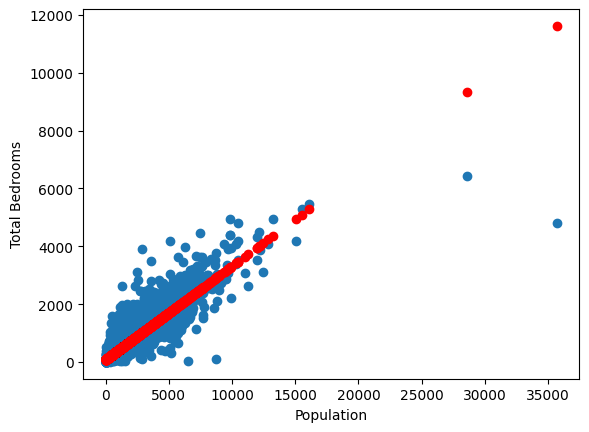

In [ ]:
pop = df['population']
bedrooms = df['total_bedrooms']

plt.scatter(pop, bedrooms)
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')

plt.scatter(pop, linear_model_predictions, color='red')
plt.show()

In [ ]:
df_predictions = pd.DataFrame({'Population':pop, 'Total Bedrooms':total_bedrooms_np, 'Linear Model Predictions':linear_model_predictions})
df_predictions.head()

,Population,Total Bedrooms,Linear Model Predictions
0,1015.0,1283.0,405.266668
1,1129.0,1901.0,442.153776
2,333.0,174.0,184.591162
3,515.0,337.0,243.481106
4,624.0,326.0,278.750359


In [ ]:
def get_predictions(model,x):

  alpha_hat = model['alpha_hat']
  beta_hat = model['beta_hat']

  return alpha_hat + beta_hat * x


test_model = {'alpha_hat':2,'beta_hat':3}
test_x = np.array([1,2,3])

get_predictions(test_model, test_x)

array([ 5,  8, 11])

In [ ]:
def mean_squared_error(y, y_predictions):
  '''
  Returns the mean squared error given the observed and predicted outputs.

  y: np.array of Floats with shape (n,) of observed outputs
  y_predictions: np.array of Floats with shape (n,) of predicted outputs

  Returns: Float representing the MSE.
  '''
  n = len(y)
  return np.sum(np.square(y - y_predictions)) / n

def mean_absolute_error(y, y_predictions):
  '''
  Returns the mean absolute error given the observed and predicted outputs.

  y: np.array of Floats with shape (n,) of observed outputs
  y_predictions: np.array of Floats with shape (n,) of predicted outputs

  Returns: Float representing the MSE.
  '''
  n = len(y)
  return np.sum(np.abs(y - y_predictions)) / n


In [ ]:
mse1 = mean_squared_error(total_bedrooms_np, linear_model_predictions)
mae1 = mean_absolute_error(total_bedrooms_np, linear_model_predictions)

print(f"MSE: {mse1:.2f}")
print(f"MAE: {mae1:.2f}")

MSE: 39712.53
MAE: 118.47
